# LangGraph Introduction

### Install Required Libraries

In [13]:
pip install --upgrade -q openai langchain langchain-openai langchain-community langgraph

Note: you may need to restart the kernel to use updated packages.


### Load Environment Variables

In [15]:
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

os.environ.get('OPENAI_API_KEY')

print("API Key Loaded", os.environ.get('OPENAI_API_KEY') is not None)

API Key Loaded True


### Import Necessary Libraries

In [17]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI

### Create the State Graph

In [19]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

### Create an instance of OpenAI

In [21]:
llm = ChatOpenAI(model_name='gpt-4o-mini', temperature=0.5)

### Define the Chatbot Function

In [23]:
def chatbot(state: State):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}

### Add the node to the Graph

In [25]:
graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

### Visualizing the Graph

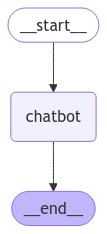

In [27]:
try:
    from IPython.display import Image, display
    mermaid_png = graph.get_graph().draw_mermaid_png()
    display(Image(mermaid_png))
except Exception as e:
    print(f"Error displaying graph: {e}")
    print("You may need to run this in a Jupyter notebook or an environment that supports IPython display.")

### Example Usage

In [29]:
inputs = {"messages": [{"role": "user", "content": "What is LangChain?"}]}
for output in graph.stream(inputs):
    print(output)

{'chatbot': {'messages': [AIMessage(content='LangChain is a framework designed to simplify the development of applications that utilize large language models (LLMs). It provides a structured way to build applications that can interact with language models, enabling developers to create complex workflows that involve natural language processing tasks.\n\nKey features of LangChain include:\n\n1. **Modularity**: LangChain is built with modular components, allowing developers to mix and match different parts depending on their application needs. This includes components for prompt management, memory, chains, agents, and more.\n\n2. **Chains**: LangChain allows developers to create "chains" of operations, where the output of one operation can be fed into another. This is useful for building more complex workflows that involve multiple steps.\n\n3. **Agents**: LangChain provides the capability to create agents that can make decisions based on user input and the context provided. These agents

### Running the ChatBot

In [31]:
while True:
    user_input = input('User: ')
    if user_input.lower() in ['quit', 'exit', 'bye', 'q']:
        print('Goodbye!')
        break

    for event in graph.stream({'messages':('user', user_input)}):
        for value in event.values():
            print(f'Assistant: {value["messages"][-1].content}')
            print('-' * 20)

User:  What is langchain?


Assistant: LangChain is a framework designed to facilitate the development of applications that leverage large language models (LLMs). It provides a set of tools and components that help developers build applications that can perform a variety of tasks, such as natural language understanding, text generation, and conversational AI.

Key features of LangChain include:

1. **Modularity**: LangChain is designed to be modular, allowing developers to combine different components like language models, data loaders, and output formats to create customized applications.

2. **Integration with LLMs**: It supports multiple large language models and can integrate with various APIs, making it easier to switch between different models or use multiple models in a single application.

3. **Prompt Management**: LangChain provides utilities for managing prompts, which are essential for guiding the behavior of language models. This includes prompt templates and strategies for optimizing prompts for spec

User:  quit


Goodbye!
